In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [143]:
df = pd.read_csv('Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')
df.sample(5) #Посмотрим образцы данных

,source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
165,https://www.goodreads.com/book/show/65213381-w...,25890,Young Adult Fantasy & Science Fiction,What the River Knows,Isabel Ibañez,4.00,"10,148","3,160",416,Hardcover,Bolivian-Argentinian Inez Olivera belongs to t...,31-Oct-23,Kindle $11.99,11.99,"Isabel Ibañez was born in Boca Raton, Florida,..."
102,https://www.goodreads.com/book/show/60766189-a...,39708,Fantasy,A Day of Fallen Night,Samantha Shannon,4.41,"22,295","4,064",868,Hardcover,"In A Day of Fallen Night, Samantha Shannon swe...",28-Feb-23,Kindle $14.46,14.46,Samantha Shannon studied English Language and ...
85,https://www.goodreads.com/book/show/73071451-t...,13061,Romantasy,Throne of the Fallen,Kerri Maniscalco,4.20,"12,861","2,201",627,Kindle Edition,Sinner. Villain. Wicked. The Prince of Envy ha...,3-Oct-23,Kindle $14.99,14.99,I'm mostly on instagram--where I'm always read...
2,https://www.goodreads.com/book/show/62926992-t...,57702,Fiction,The Wishing Game,Meg Shaffer,4.19,"62,142","10,594",304,Hardcover,Make a wish. . . .Lucy Hart knows better than ...,30-May-23,Kindle $2.99,2.99,Meg Shaffer is a film student in TV and Screen...
188,https://www.goodreads.com/book/show/58469344-t...,15401,Young Adult Fiction,The Davenports,Krystal Marquis,3.67,"7,834","1,705",384,Hardcover,"In 1910, the Davenports are one of the few Bla...",31-Jan-23,Kindle $10.99,10.99,Krystal Marquis happily spends most of her tim...


In [144]:
df.drop(['source_URL','Book Description','About the Author'],axis=1, inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Readers Choice Votes      299 non-null    int64  
 1   Readers Choice Category   299 non-null    object 
 2   Title                     299 non-null    object 
 3   Author                    299 non-null    object 
 4   Total Avg Rating          299 non-null    float64
 5   Number of Ratings         299 non-null    object 
 6   Number of Reviews         299 non-null    object 
 7   Number of Pages           299 non-null    int64  
 8   Edition                   299 non-null    object 
 9   First Published date      299 non-null    object 
 10  Kindle Version and Price  299 non-null    object 
 11  Kindle Price              299 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 28.2+ KB


In [146]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,392.394649,11.327926
std,32406.337679,0.252188,123.698044,5.351909
min,935.000000,3.520000,192.000000,0.000000
25%,3591.000000,3.855000,320.000000,9.990000
50%,10099.000000,4.060000,368.000000,13.990000
75%,24714.000000,4.250000,432.000000,14.990000
max,397565.000000,4.750000,1242.000000,17.990000


In [147]:
numeric_columns = ['Number of Ratings','Number of Reviews']

#Убираем запятую-разделитель и в столбцах numeric_columns и приводим к формату int32 для дальнейшей обработки
for column in numeric_columns:
    df[column] = df[column].replace(',', '', regex=True).astype('int32')

In [148]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,38748.351171,5241.705686,392.394649,11.327926
std,32406.337679,0.252188,79586.655592,10800.069660,123.698044,5.351909
min,935.000000,3.520000,228.000000,71.000000,192.000000,0.000000
25%,3591.000000,3.855000,5516.500000,952.000000,320.000000,9.990000
50%,10099.000000,4.060000,14519.000000,2469.000000,368.000000,13.990000
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,14.990000
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,17.990000


Readers Choice Category
Fiction                                  20
Historical Fiction                       20
Mystery & Thriller                       20
Romance                                  20
Romantasy                                20
Fantasy                                  20
Science Fiction                          20
Horror                                   20
Young Adult Fantasy & Science Fiction    20
Young Adult Fiction                      20
Nonfiction                               20
History & Biography                      20
Memoir & Autobiography                   20
Humor                                    20
Debut Novel                              19
Name: count, dtype: int64


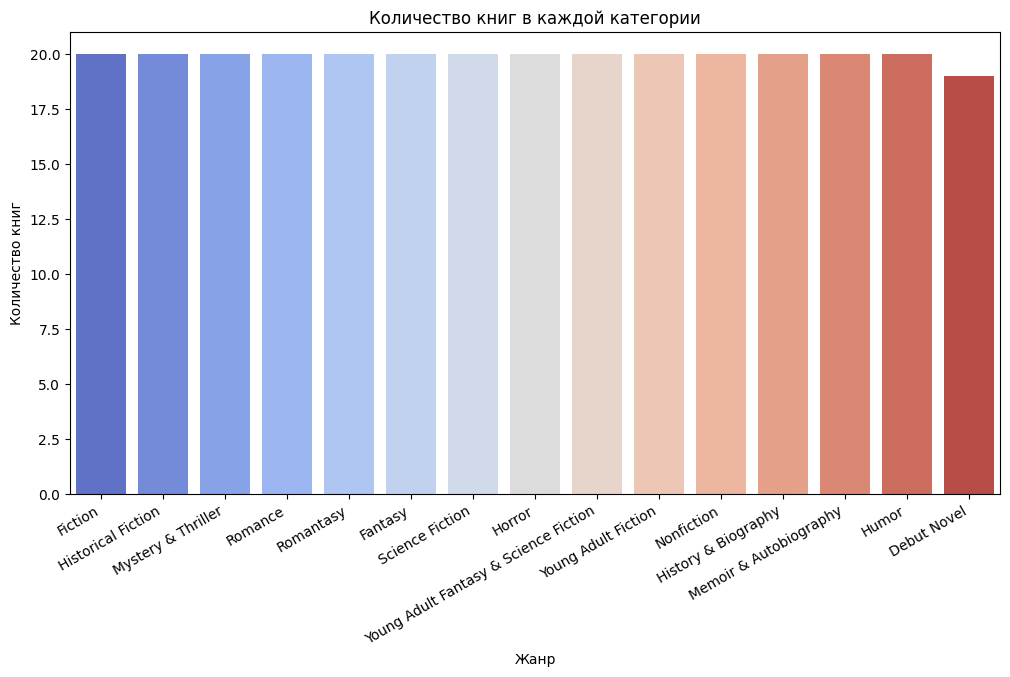

In [149]:
cat_counts = df['Readers Choice Category'].value_counts()
print(cat_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette='coolwarm')
plt.title('Количество книг в каждой категории')
plt.xlabel('Жанр')
plt.ylabel('Количество книг')
plt.xticks(rotation=30, ha='right')
plt.show()

In [150]:
#Выбираем какие столбцы и как будем агрегировать
aggregations = {'Readers Choice Votes': 'sum', 
                'Total Avg Rating': 'mean',
                'Number of Ratings': 'sum',
                'Number of Reviews': 'sum',
                'Number of Pages': 'median',
                'Kindle Price': 'median',
               }

#Группируем книги по категориям
category_vote = df.groupby('Readers Choice Category').agg(aggregations).sort_values('Readers Choice Votes', ascending=False)

#Считаем проценты от общего количества голосов, общих оценок и общих отзывов в каждой категории
total_votes = category_vote['Readers Choice Votes'].sum()
total_ratings = category_vote['Number of Ratings'].sum()
total_reviews = category_vote['Number of Reviews'].sum()
percent_of_total_votes = (category_vote['Readers Choice Votes'] / total_votes) * 100
percent_of_total_ratings = (category_vote['Number of Ratings'] / total_ratings) * 100
percent_of_total_reviews = (category_vote['Number of Reviews'] / total_reviews) * 100

#Делаем таблицу со всеми ключевыми метриками по категориям 
result_df = pd.DataFrame({
    'Votes (sum)': category_vote['Readers Choice Votes'], 
    '% Votes': percent_of_total_votes, 
    'Avg Ratings': category_vote['Total Avg Rating'].round(2),
    'Number of Ratings': category_vote['Number of Ratings'],
    '% of Total Ratings': percent_of_total_ratings.round(2),
    'Number of Reviews': category_vote['Number of Reviews'],
    '% of Total Reviews': percent_of_total_reviews.round(2),
    'Median Pages': category_vote['Number of Pages'],
    'Median Kindle Price': category_vote['Kindle Price'].round(2)
    })

result_df

,Votes (sum),% Votes,Avg Ratings,Number of Ratings,% of Total Ratings,Number of Reviews,% of Total Reviews,Median Pages,Median Kindle Price
Readers Choice Category,,,,,,,,,
Romance,645601,10.981079,4.06,2737676,23.63,336747,21.49,398.0,6.99
Fiction,587718,9.996542,3.95,1288841,11.12,157445,10.05,328.0,14.99
Romantasy,572812,9.743005,4.07,1387830,11.98,203928,13.01,506.0,5.49
Mystery & Thriller,519745,8.840384,4.05,1673792,14.45,181312,11.57,365.5,14.99
Fantasy,456020,7.756480,4.10,523942,4.52,93625,5.97,407.5,14.73
Young Adult Fantasy & Science Fiction,400863,6.818311,4.04,543467,4.69,113098,7.22,440.0,10.99
Historical Fiction,390321,6.639001,4.14,692953,5.98,79846,5.09,368.0,12.99
Memoir & Autobiography,389374,6.622893,4.18,814014,7.03,99369,6.34,298.5,14.99
Young Adult Fiction,371283,6.315182,3.97,392355,3.39,73957,4.72,384.0,10.99


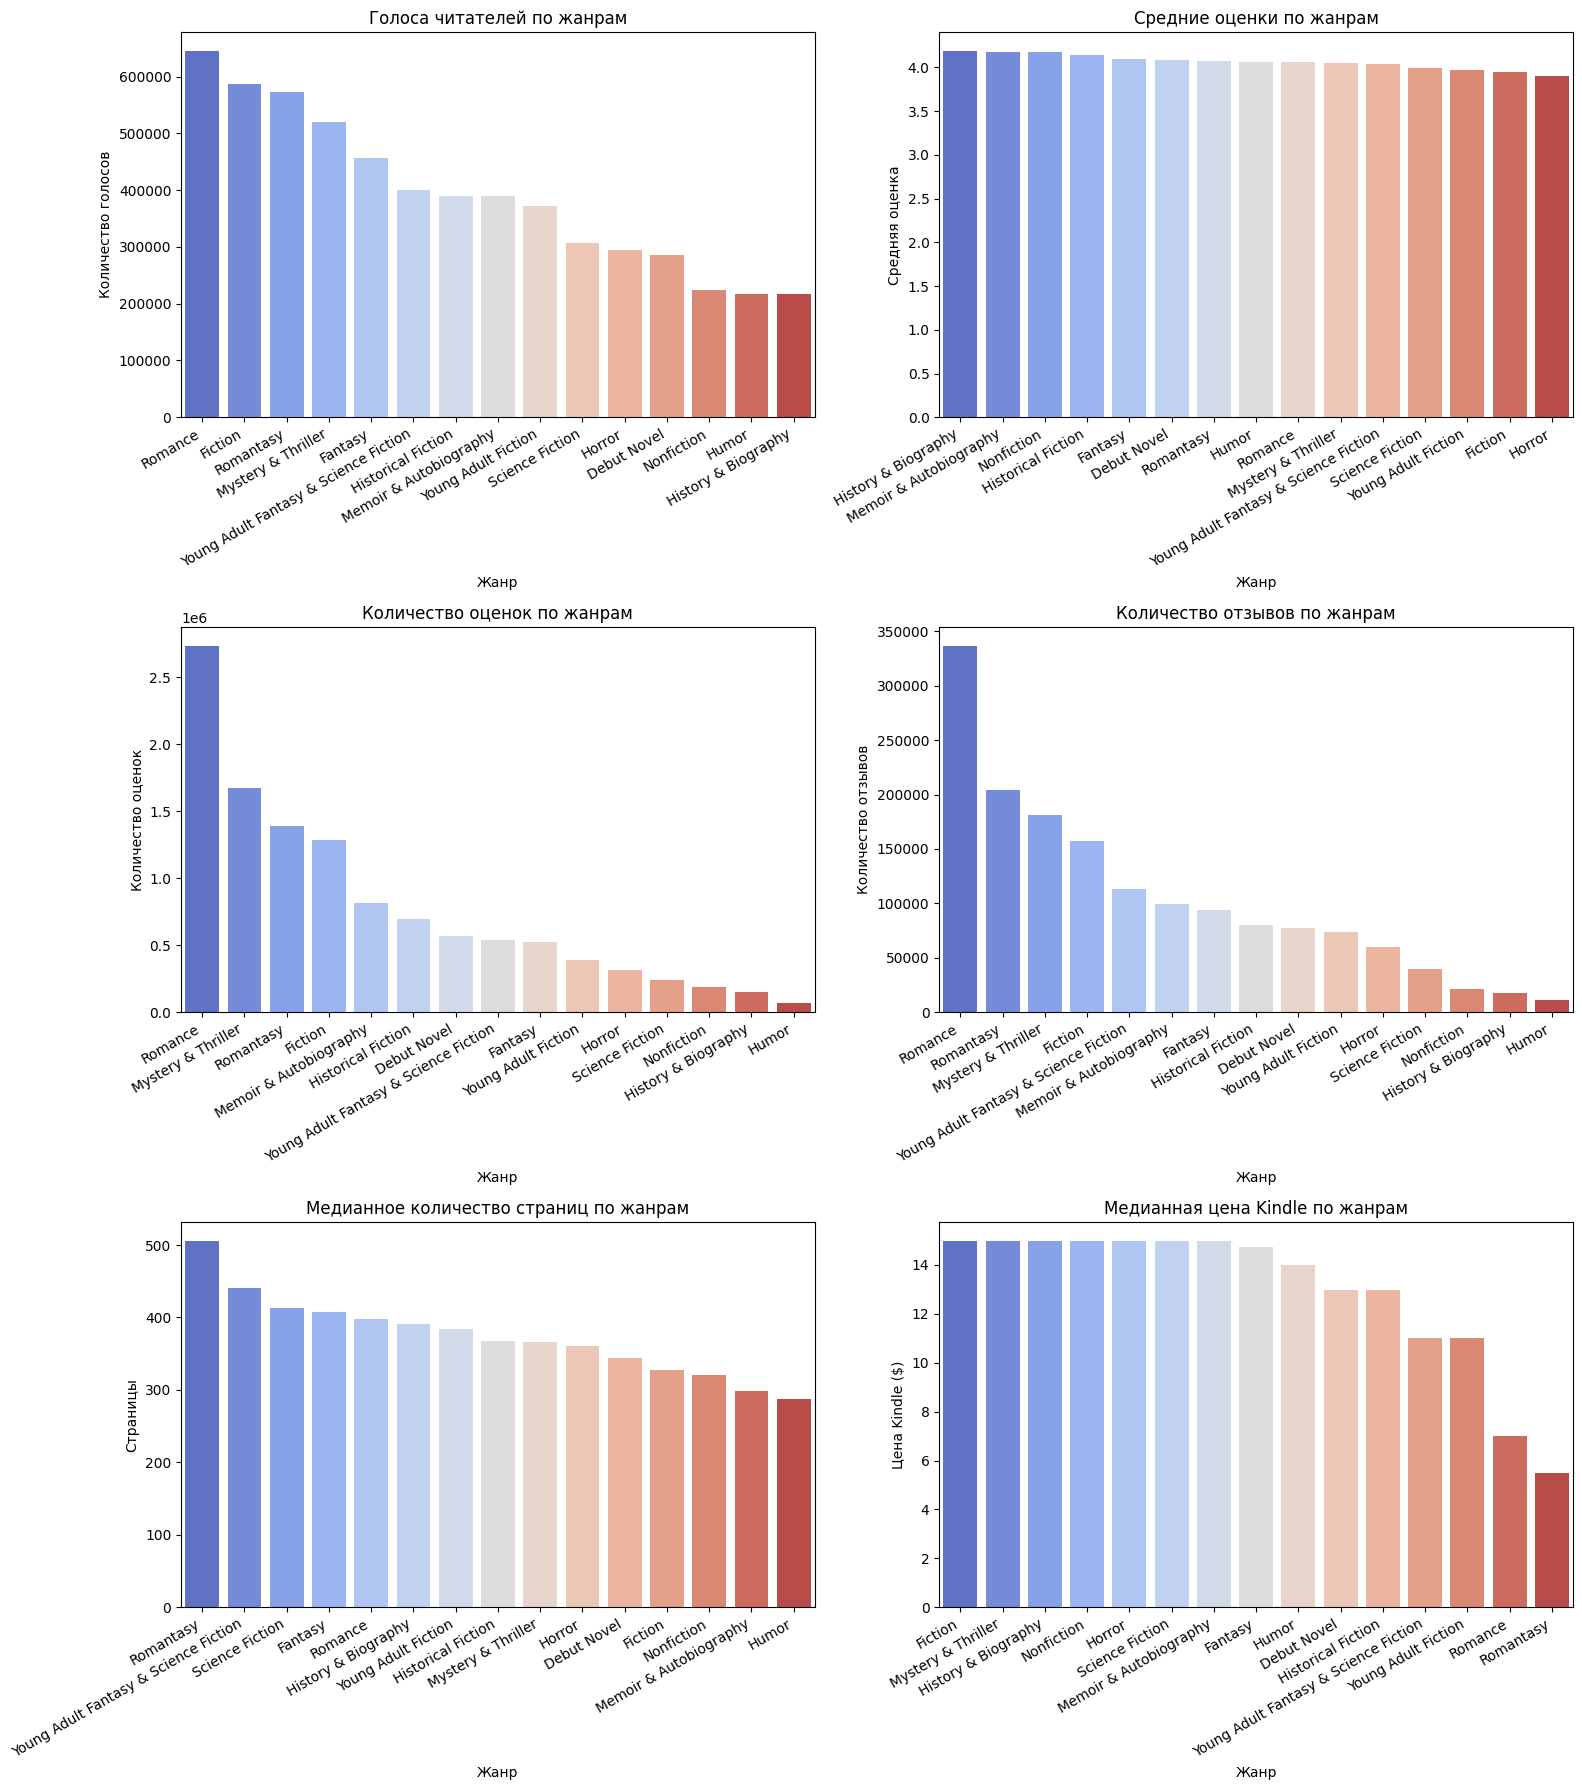

In [151]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=False)

# Первый график
sns.barplot(x=result_df.index, y=result_df['Votes (sum)'], palette='coolwarm', order=result_df.index, ax=axes[0, 0])
axes[0, 0].set_title('Голоса читателей по жанрам')
axes[0, 0].set_ylabel('Количество голосов')
axes[0, 0].set_xlabel('Жанр')
axes[0, 0].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

# Второй график
result_df_sorted = result_df.sort_values(by='Avg Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Avg Ratings'], palette='coolwarm', order=result_df_sorted.index, ax=axes[0, 1])
axes[0, 1].set_title('Средние оценки по жанрам')
axes[0, 1].set_ylabel('Средняя оценка')
axes[0, 1].set_xlabel('Жанр')
axes[0, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Третий график
result_df_sorted = result_df.sort_values(by='Number of Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Number of Ratings'], palette='coolwarm', order=result_df_sorted.index, ax=axes[1, 0])
axes[1, 0].set_title('Количество оценок по жанрам')
axes[1, 0].set_ylabel('Количество оценок')
axes[1, 0].set_xlabel('Жанр')
axes[1, 0].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Четвертый график
result_df_sorted = result_df.sort_values(by='Number of Reviews', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Number of Reviews'], palette='coolwarm', order=result_df_sorted.index, ax=axes[1, 1])
axes[1, 1].set_title('Количество отзывов по жанрам')
axes[1, 1].set_ylabel('Количество отзывов')
axes[1, 1].set_xlabel('Жанр')
axes[1, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Пятый график
result_df_sorted = result_df.sort_values(by='Median Pages', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Pages'], palette='coolwarm', order=result_df_sorted.index, ax=axes[2, 0])
axes[2, 0].set_title('Медианное количество страниц по жанрам')
axes[2, 0].set_ylabel('Страницы')
axes[2, 0].set_xlabel('Жанр')
axes[2, 0].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

# Шестой график
result_df_sorted = result_df.sort_values(by='Median Kindle Price', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Kindle Price'], palette='coolwarm', order=result_df_sorted.index, ax=axes[2, 1])
axes[2, 1].set_title('Медианная цена Kindle по жанрам')
axes[2, 1].set_ylabel('Цена Kindle ($)')
axes[2, 1].set_xlabel('Жанр')
axes[2, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

plt.tight_layout()
plt.show()

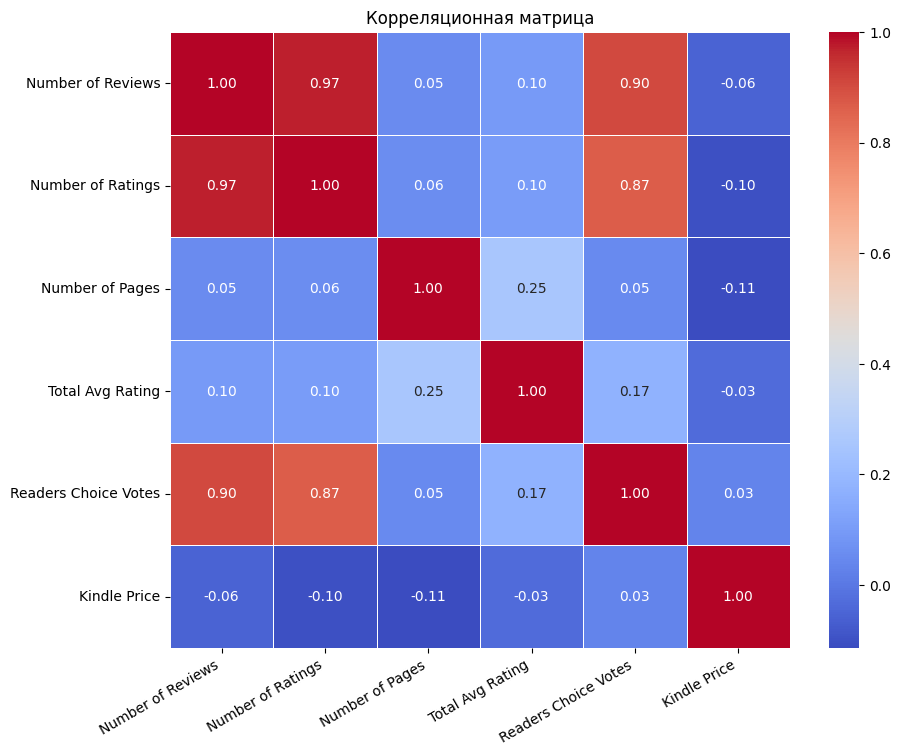

In [152]:
columns_of_interest = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Readers Choice Votes', 'Kindle Price']

# Считаем корреляционную матрицу
correlation_matrix = df[columns_of_interest].corr()

# Отображаем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Корреляционная матрица')
plt.xticks(rotation=30, ha='right')
plt.show()